In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


FHN2_try3_params (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie

In [3]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true,), adaptive = false, dt = 0.001)

In [18]:
I0 = -1.702; U0 = 0.27;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [4.9594801846571634, 0.775920980522911, 0.4403223065284447]    

3-element Vector{Float64}:
 4.9594801846571634
 0.775920980522911
 0.4403223065284447

In [19]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = tt);

In [7]:
#=ts, tf = 1, 300000
tsh, tfh = 1, 17000
indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)



lines!(axis3, tr[ts:tf, indexx], tr[ts:tf, indexy], tr[ts:tf, indexz], linewidth = 1.5, color = :black)
display(f)=#

In [51]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images/RJND/"

"/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images/RJND/"

In [52]:
pathtosave * "phase_space_chaotic_attractor.eps"

"/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images/RJND/phase_space_chaotic_attractor.eps"

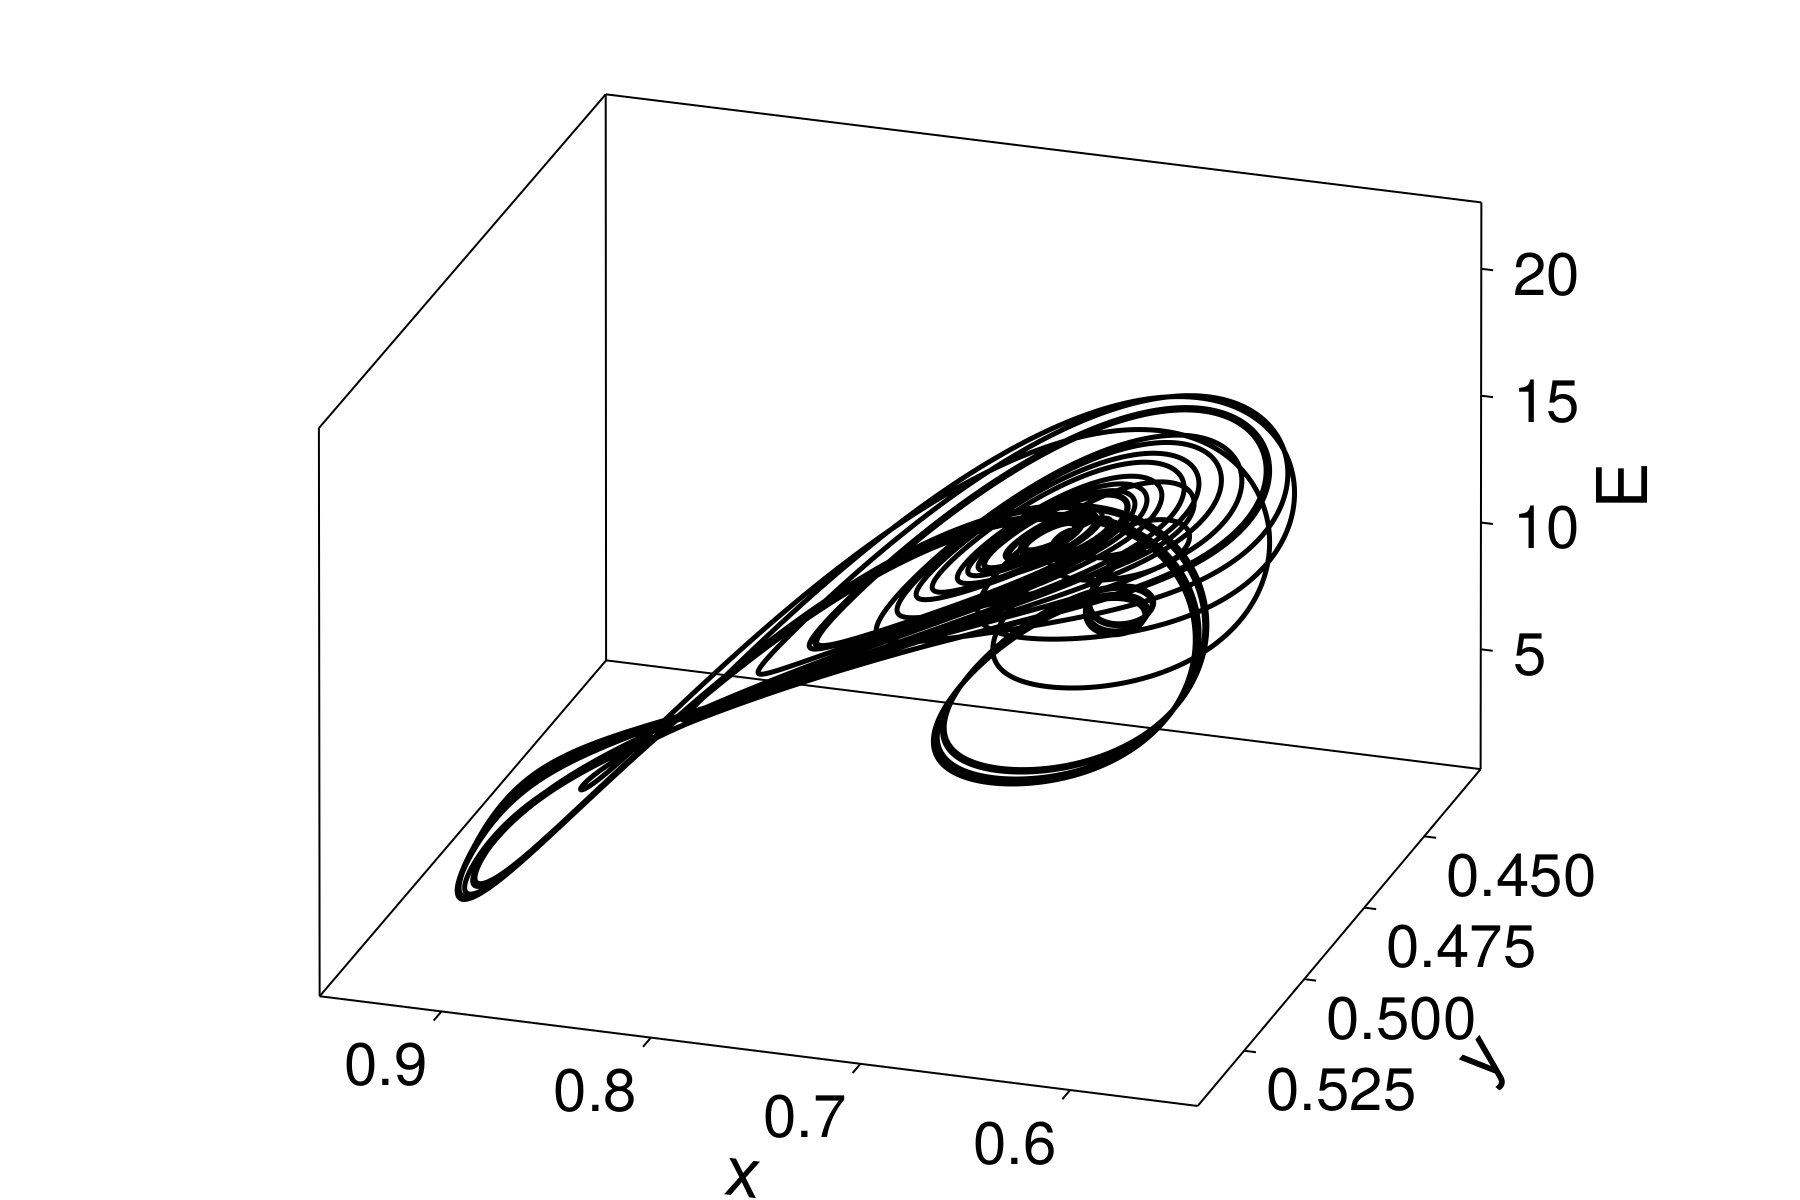

CairoMakie.Screen{EPS}


In [53]:
ts, tf = 300000, 325000
lb_size = 35; tck_size = 30;
indexx,indexy,indexz = 2, 3, 1
disy = 70.0
azim = 0.6pi

f = Figure(size = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                azimuth = azim,
                ylabeloffset = disy)

lines!(axis3, tr[ts:tf, indexx], tr[ts:tf, indexy], tr[ts:tf, 1indexz], linewidth = 2.5, color = :black)
display(f)
save(pathtosave * "phase_space_chaotic_attractor.eps", f)

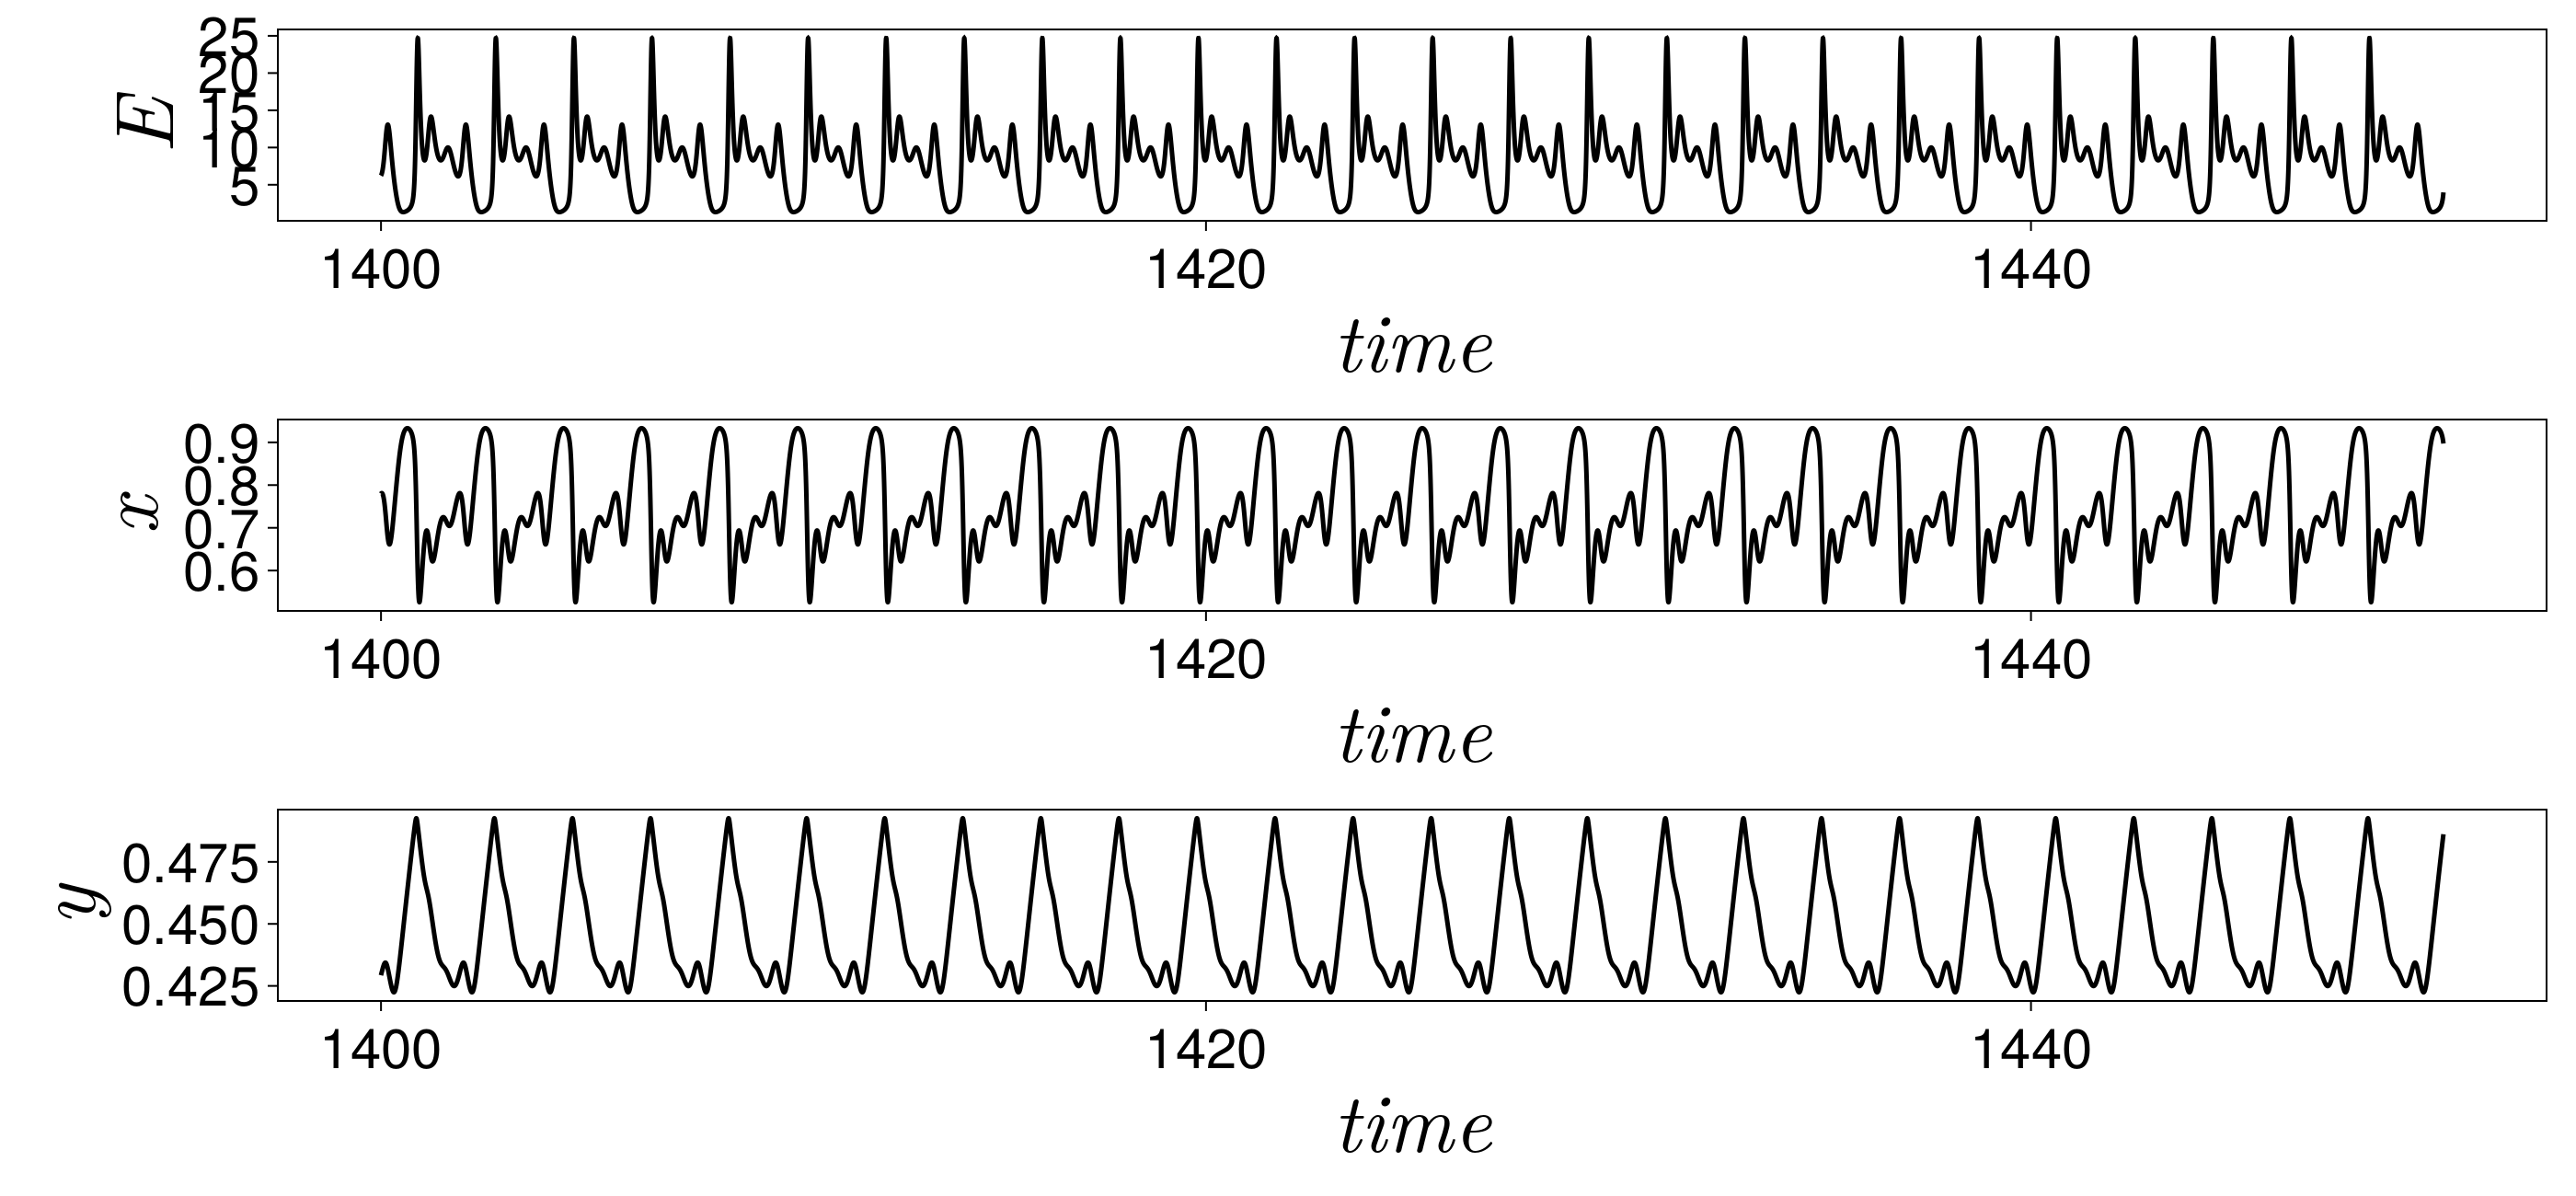

CairoMakie.Screen{IMAGE}


In [9]:
ts, tf = 400000, 450000
textsize = 35
hei = 18

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(size = (1400, 650))
axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

axisx = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$x$",
xlabelsize = lb_size, ylabelsize = lb_size,
xticklabelsize = tck_size, yticklabelsize = tck_size,
xgridvisible = false, ygridvisible = false)

axisy = Axis(f[3, 1], xlabel = L"$time$", ylabel = L"$y$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
lines!(axisx, trange[ts:tf], tr[ts:tf, 2], linewidth = 2.5, color = :black)

lines!(axisy, trange[ts:tf], tr[ts:tf, 3], linewidth = 2.5, color = :black)
display(f)